<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### License Plate Detection using OpenCV and OCR

The code template demonstrates car License plate detection using OpenCV and Optical Character Recognition(OCR). OCR is a technology that recognizes text within a digital image.

## Required Packages

In [1]:
!pip install opencv-python
!pip install easyocr

In [2]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization

Path of the image to be loaded

In [3]:
im_1_path = ''


## EasyOCR
EasyOCR optical character recognition library reads short texts (such as serial numbers,recognizes numberplat, part numbers and dates).

It uses font files (pre-defined OCR-A, OCR-B and Semi standard fonts, or other learned fonts ) with a template matching algorithm that can recognize even badly printed, broken or connected characters of any size.

#### Reading our image
OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

We use the the "cv2.imread()" method to load an image from the specified file path.

In [4]:
def recognize_text(img_path):
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [11]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes numberplat, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(200, 60)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), 
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: SWIFTREG (Probability: 0.98)


<Figure size 432x288 with 0 Axes>

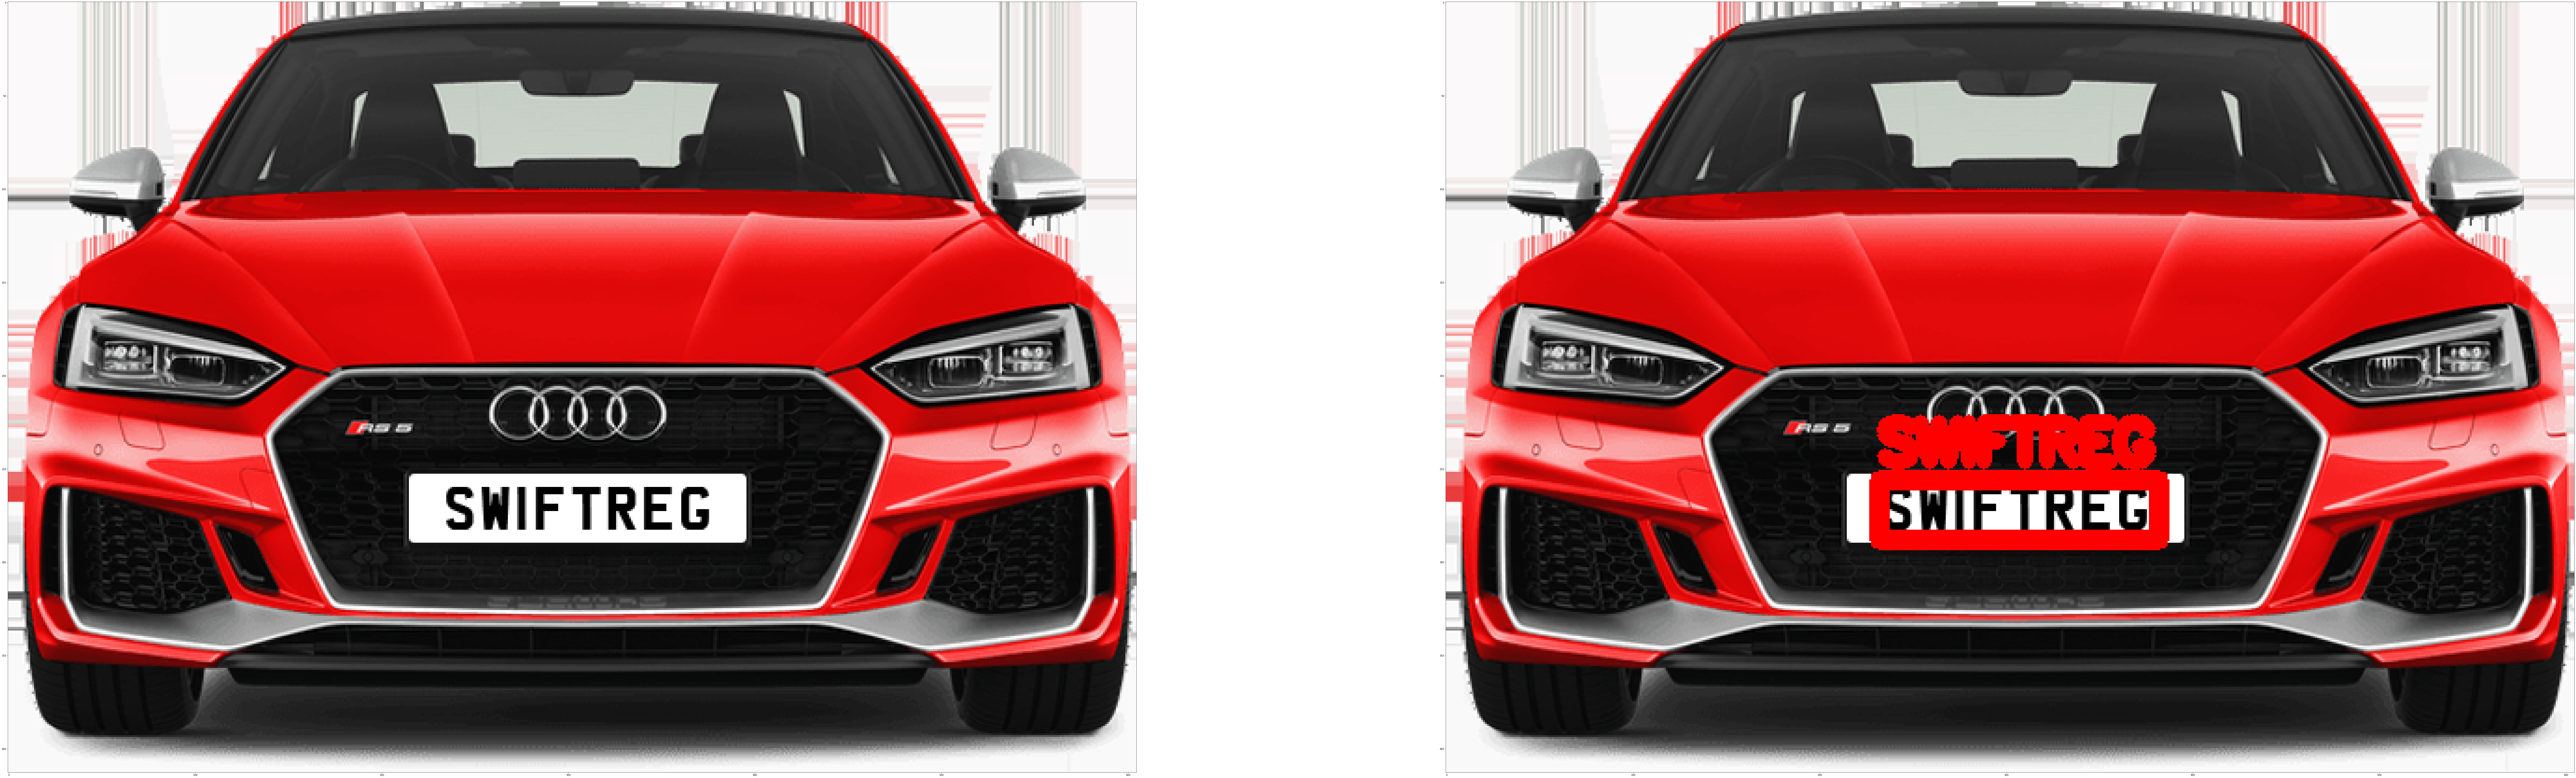

In [12]:
overlay_ocr_text(im_1_path, '1_carplate')

### Creator: Vipin Kumar , Github: [Profile](https://github.com/devVipin01)